In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("TwoParameterBlueSkyCatastrophe_benchmark.csv")
df.steps = df.steps.apply(eval)
df

,algorithm,heuristics,steps
0,BFS,none,"[8618, 7410, 10906, 1926, 2474, 1363, 8027, 11..."
1,BFS,AED,"[15822, 1666, 14112, 1278, 4279, 8558, 2165, 8..."
2,BFS,AEQD,"[15247, 8149, 8887, 2536, 1776, 1844, 7768, 88..."
3,BFS,SMD,"[1522, 2028, 1499, 1371, 1575, 1586, 1354, 184..."
4,ID-DLS,none,"[13221, 166, 10714, 6313, 8397, 452, 14723, 20..."
5,ID-DLS,AED,"[19957, 3426, 55, 7858, 7319, 1833, 522, 66, 1..."
6,ID-DLS,AEQD,"[7843, 15159, 806, 500, 869, 800, 868, 434, 66..."
7,ID-DLS,SMD,"[1193, 346, 863, 303, 908, 932, 1193, 540, 364..."


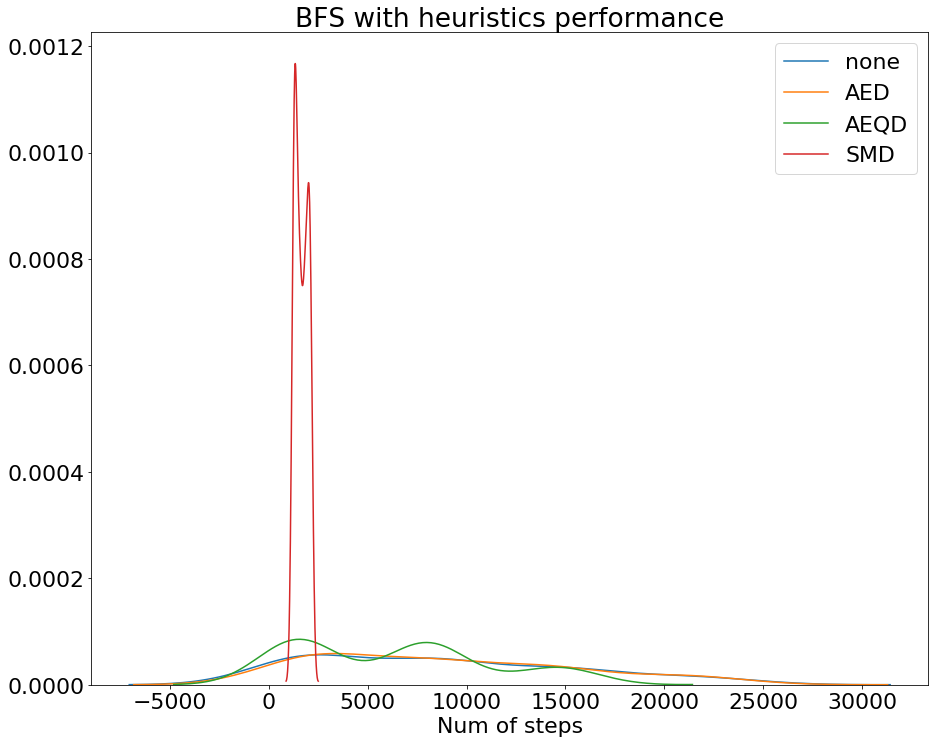

In [3]:
df_bfs = df[df.algorithm == "BFS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_bfs[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("BFS with heuristics performance");


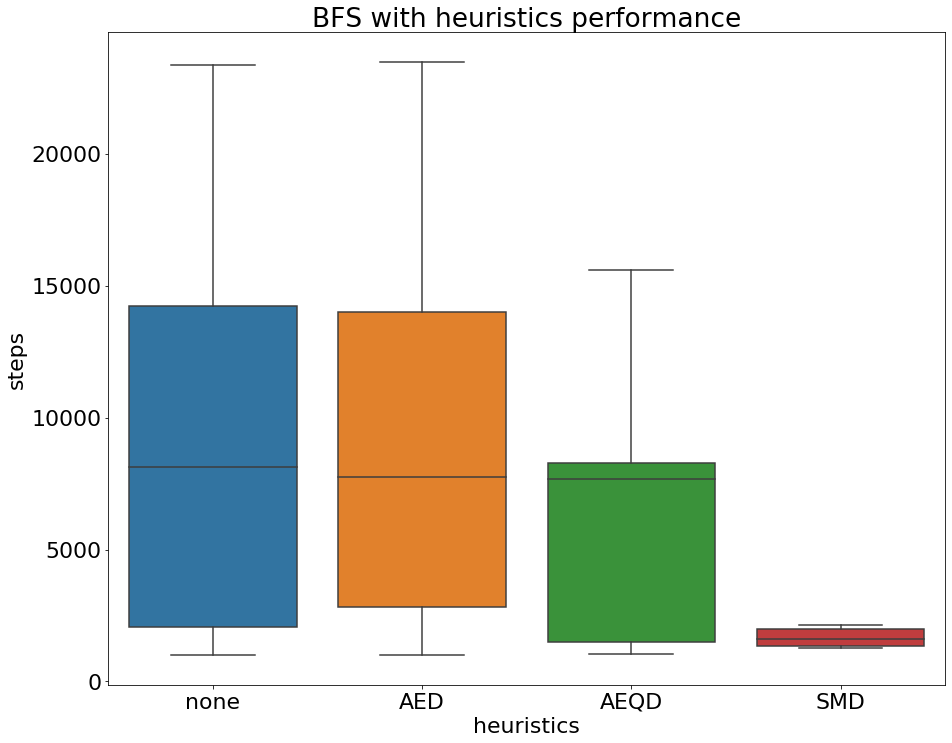

In [4]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_bfs.explode("steps"))
plt.title("BFS with heuristics performance");

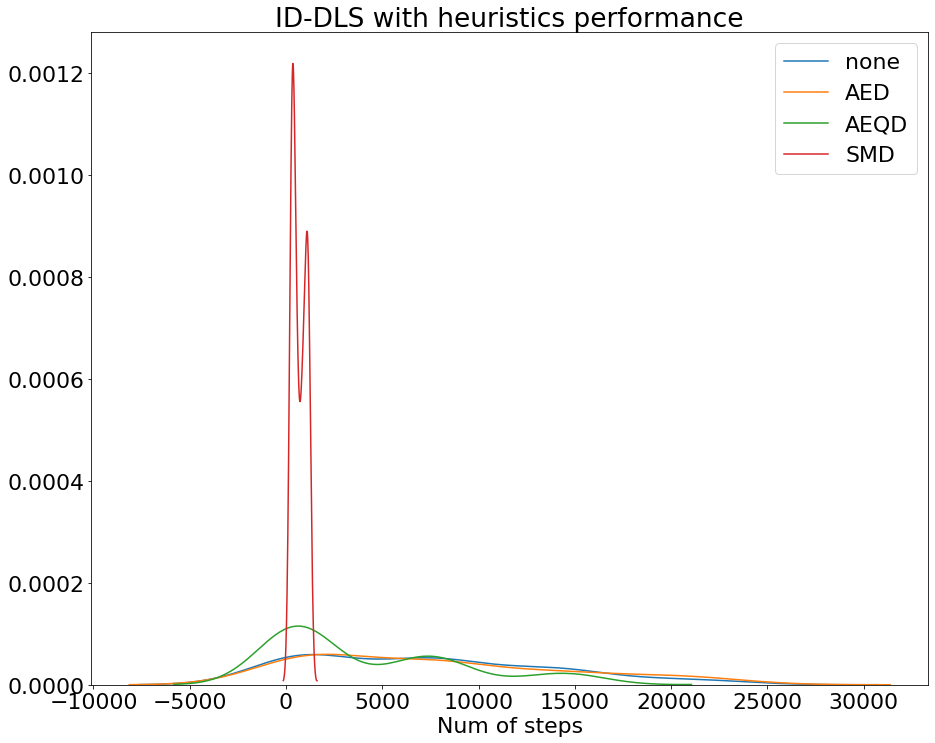

In [5]:
df_iddls = df[df.algorithm == "ID-DLS"][["heuristics", "steps"]]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_iddls[['heuristics', 'steps']].iterrows():
    sns.distplot(row.steps, label=row.heuristics, kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("ID-DLS with heuristics performance");


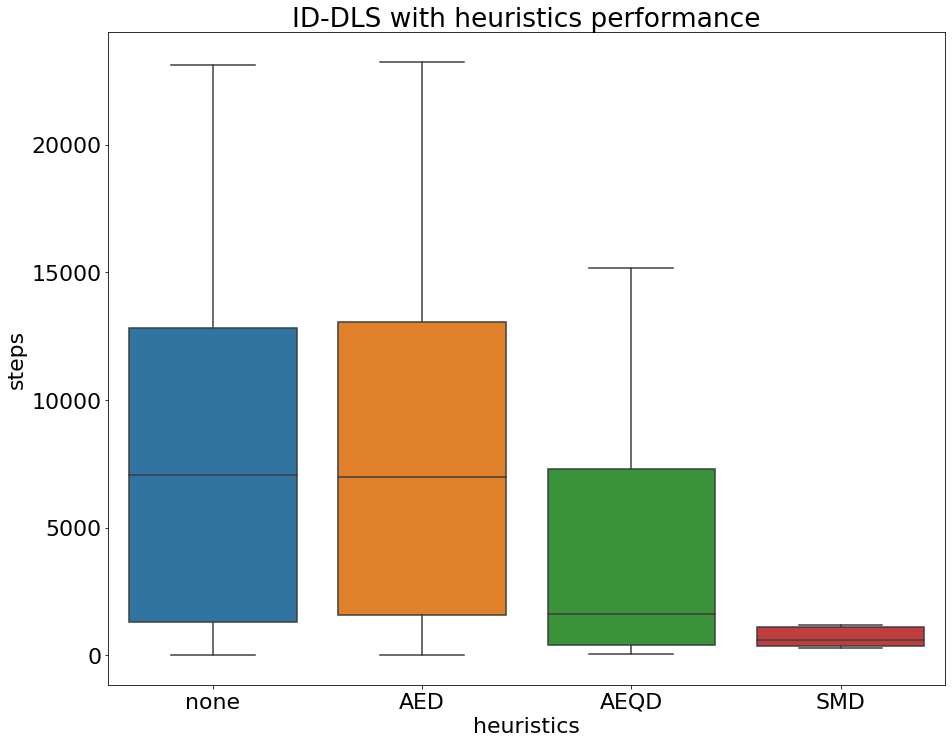

In [6]:
plt.figure(figsize=(15, 12))
sns.boxplot("heuristics", "steps", data=df_iddls.explode("steps"))
plt.title("ID-DLS with heuristics performance");

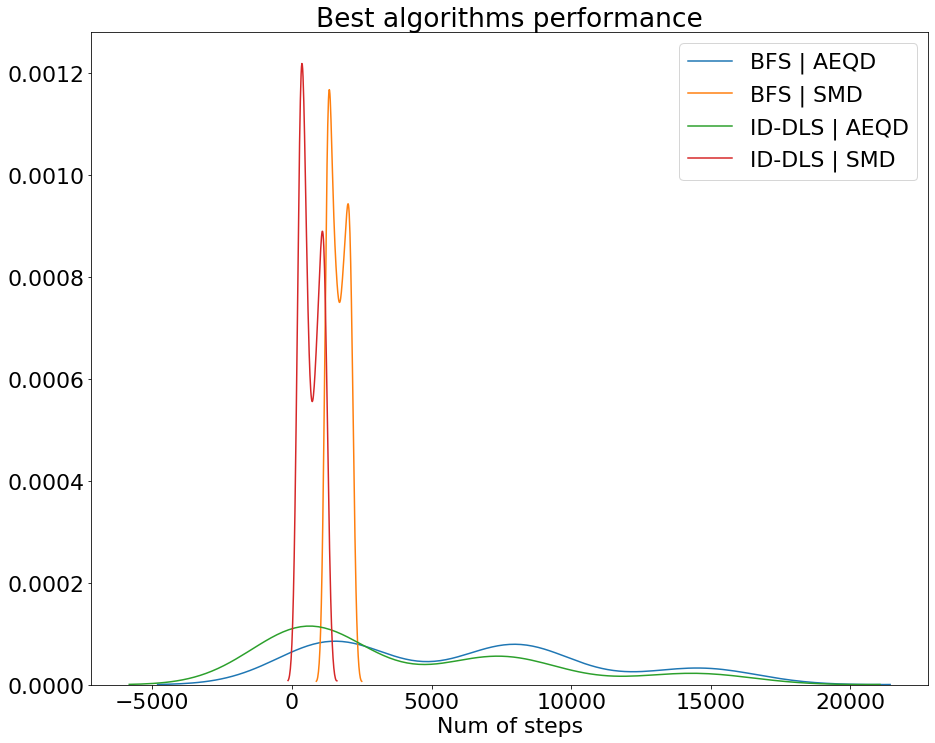

In [7]:
df_best = df[(df.heuristics.isin(["AEQD", "SMD"]))]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_best.iterrows():
    sns.distplot(row.steps, label=f"{row.algorithm} | {row.heuristics}", kde=True, hist=False)
    
plt.legend()
plt.xlabel("Num of steps")
plt.title("Best algorithms performance");


c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


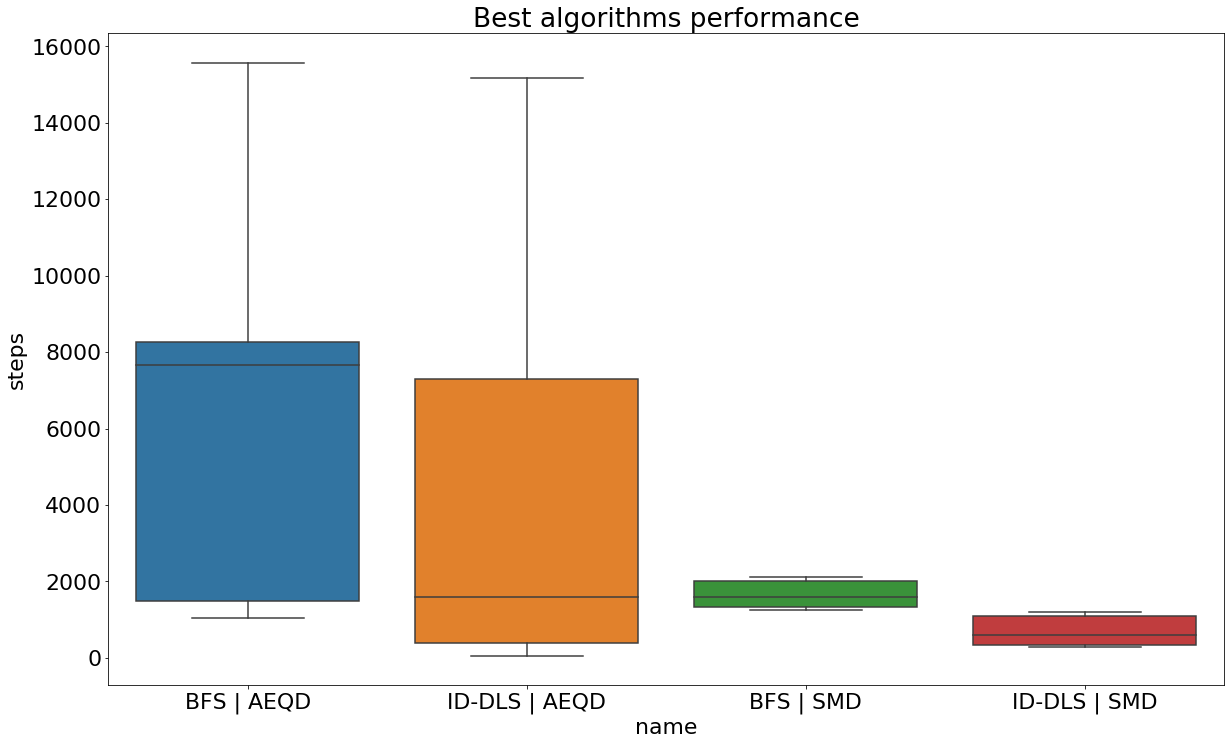

In [9]:
plt.figure(figsize=(20, 12))
df_best["name"] = df_best.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_best.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


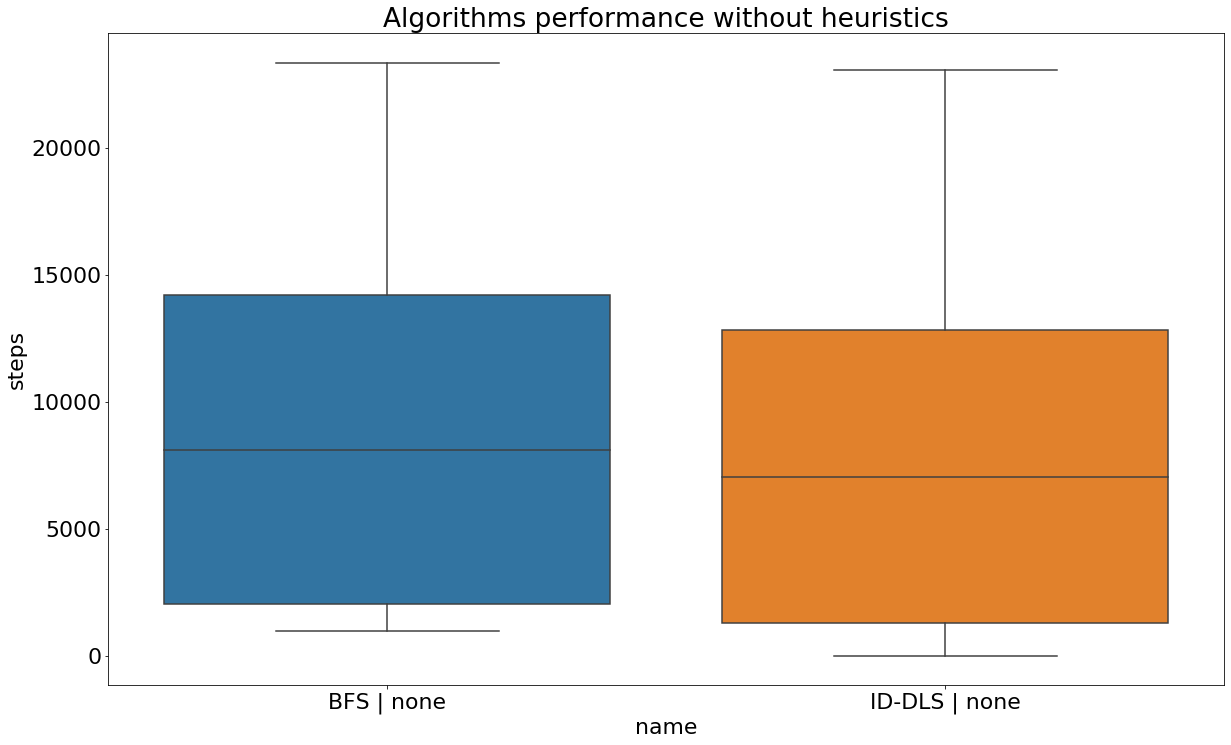

In [10]:
df_no_heur = df[(df.heuristics.isin(["none"]))]

plt.figure(figsize=(20, 12))
df_no_heur["name"] = df_no_heur.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_no_heur.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Algorithms performance without heuristics");

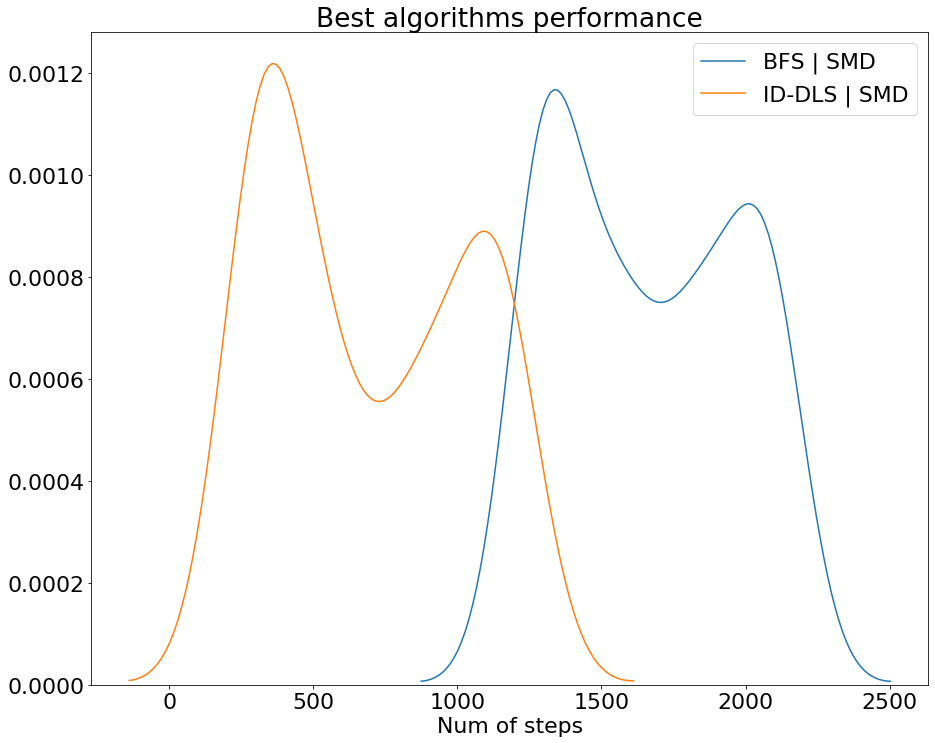

In [12]:
df_smd = df[(df.heuristics.isin(["SMD"]))]

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(15, 12))

for _, row in df_smd.iterrows():
    sns.distplot(row.steps, label=f"{row.algorithm} | {row.heuristics}", kde=True, hist=False)

plt.legend()
plt.xlabel("Num of steps")
plt.title("Best algorithms performance");

c:\python\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


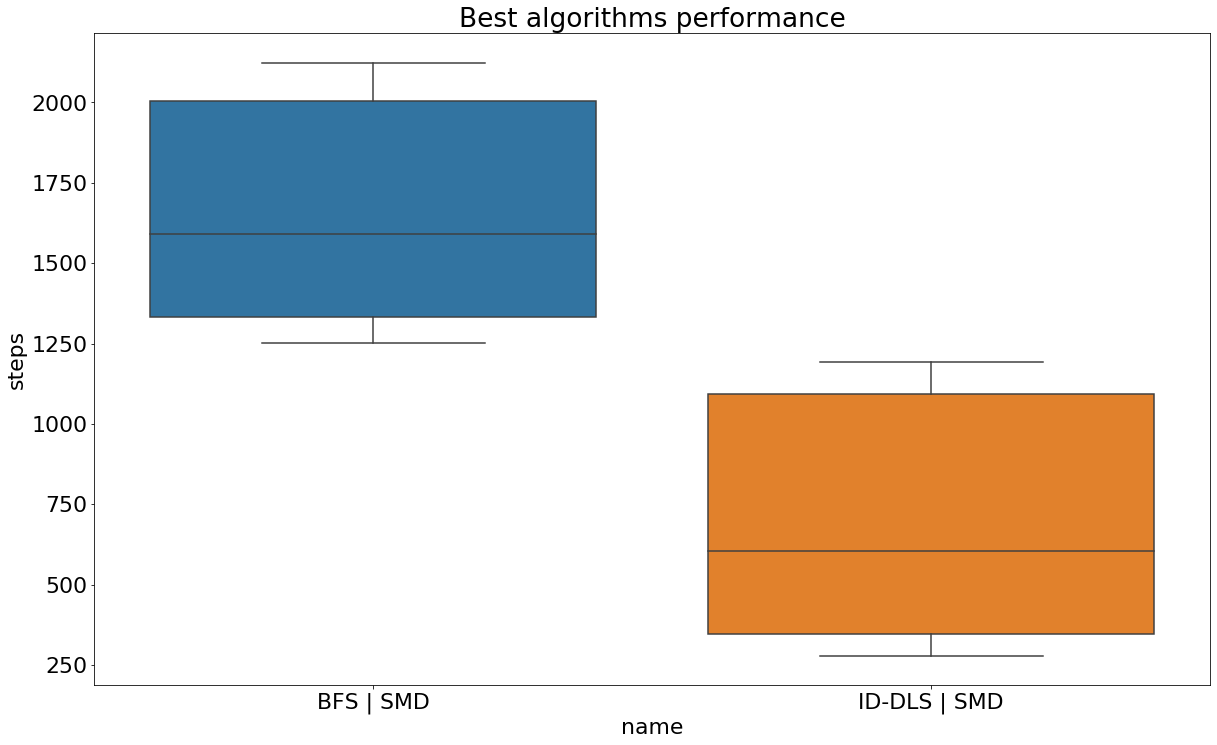

In [13]:
plt.figure(figsize=(20, 12))
df_smd["name"] = df_smd.apply(lambda ah: f"{ah[0]} | {ah[1]}", axis=1)
sns.boxplot("name", "steps", data=df_smd.explode("steps").sort_values(by=["heuristics", "algorithm"]))
plt.title("Best algorithms performance");

In [20]:
smd_iddls = df[(df.algorithm == "ID-DLS") & (df.heuristics == "SMD")].steps.values[0]
bfs_none = df[(df.algorithm == "BFS") & (df.heuristics == "none")].steps.values[0]

print(f"SMD ID-DLS: {np.mean(smd_iddls)} +- {np.std(smd_iddls)}")
print(f"BFS: {np.mean(bfs_none)} +- {np.std(bfs_none)}")


SMD ID-DLS: 686.125 +- 341.24086220976915
BFS: 8803.933333333332 +- 6576.698051623035
